# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 605


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?q={city}&appid={weather_api_key}&units=Metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | saint-pierre
Processing Record 2 of Set 1 | port mathurin
Processing Record 3 of Set 1 | kudahuvadhoo
Processing Record 4 of Set 1 | anadyr
Processing Record 5 of Set 1 | lazaro cardenas
Processing Record 6 of Set 1 | egilsstadir
Processing Record 7 of Set 1 | lihue
Processing Record 8 of Set 1 | hamilton
Processing Record 9 of Set 1 | blackmans bay
Processing Record 10 of Set 1 | pudozh
Processing Record 11 of Set 1 | adamstown
Processing Record 12 of Set 1 | port-aux-francais
Processing Record 13 of Set 1 | dryden
Processing Record 14 of Set 1 | fale old settlement
Processing Record 15 of Set 1 | hawaiian paradise park
Processing Record 16 of Set 1 | nazarabad
Processing Record 17 of Set 1 | margaret river
Processing Record 18 of Set 1 | devinuwara
City not found. Skipping...
Processing Record 19 of Set 1 | ilulissat
Processing Record 20 of Set 1 | nieuw amsterdam
Processing Record 21 of Set 1 

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df =  pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          580
Lat           580
Lng           580
Max Temp      580
Humidity      580
Cloudiness    580
Wind Speed    580
Country       580
Date          580
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,saint-pierre,-21.3393,55.4781,24.76,68,100,3.09,RE,1697598114
1,port mathurin,-19.6833,63.4167,23.74,80,33,4.28,MU,1697598114
2,kudahuvadhoo,2.6708,72.8944,27.83,74,21,4.96,MV,1697598031
3,anadyr,64.7500,177.4833,-5.72,62,20,8.00,RU,1697598115
4,lazaro cardenas,17.9583,-102.2000,25.72,88,100,0.38,MX,1697598116


In [35]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [36]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,saint-pierre,-21.3393,55.4781,24.76,68,100,3.09,RE,1697598114
1,port mathurin,-19.6833,63.4167,23.74,80,33,4.28,MU,1697598114
2,kudahuvadhoo,2.6708,72.8944,27.83,74,21,4.96,MV,1697598031
3,anadyr,64.7500,177.4833,-5.72,62,20,8.00,RU,1697598115
4,lazaro cardenas,17.9583,-102.2000,25.72,88,100,0.38,MX,1697598116


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

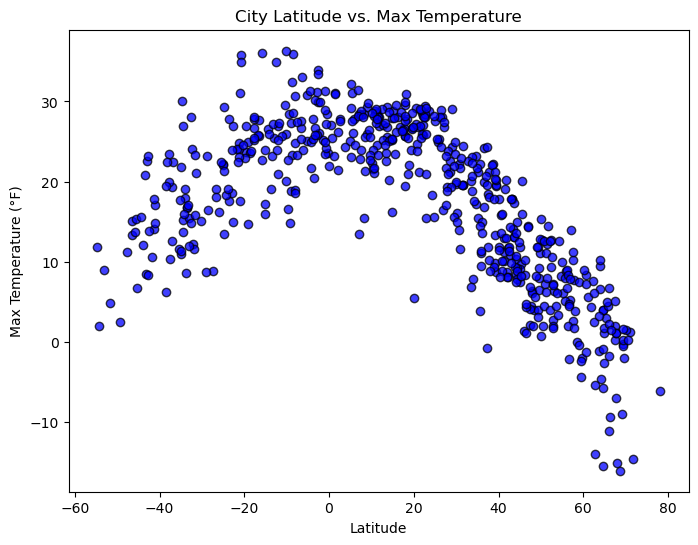

In [38]:
# Build scatter plot for latitude vs. temperature
plt.figure(figsize=(8, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], color="blue", edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°F)")

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

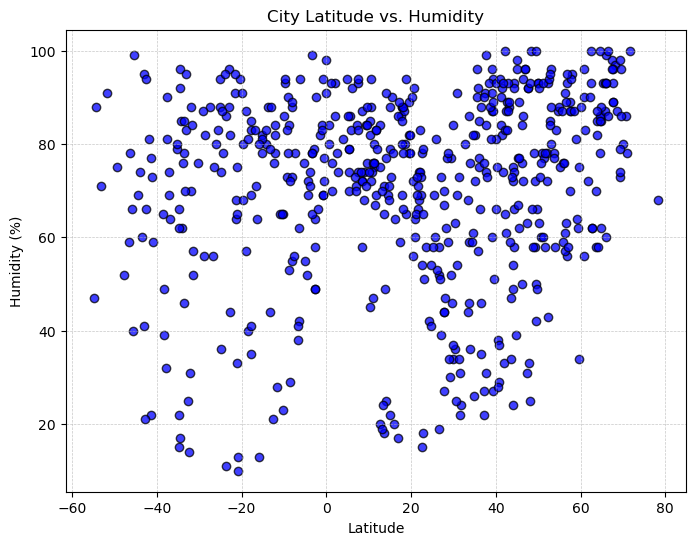

In [39]:
# Build the scatter plots for latitude vs. humidity
plt.figure(figsize=(8, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], color="blue", edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

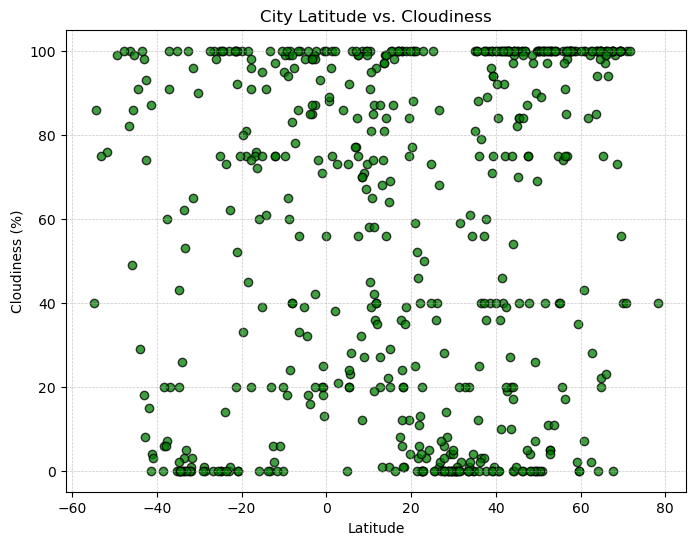

In [40]:
# Build the scatter plots for latitude vs. cloudiness
plt.figure(figsize=(8, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], color="green", edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

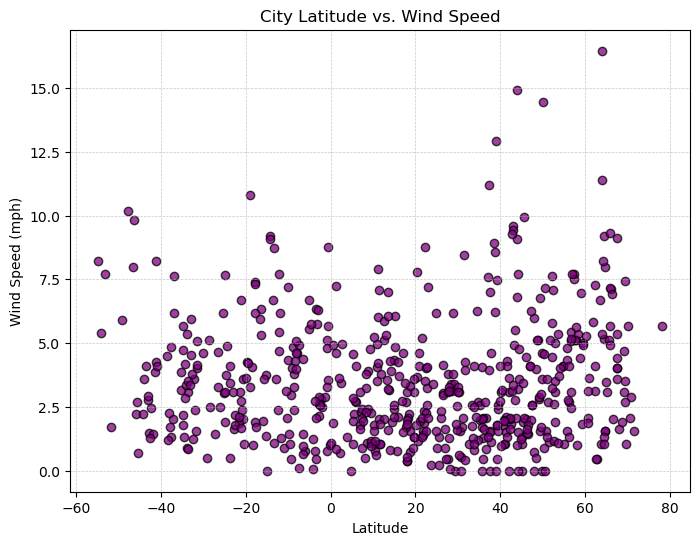

In [41]:
# Build the scatter plots for latitude vs. wind speed
plt.figure(figsize=(8, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], color="purple", edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [16]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, x_coord, y_coord):
 
    plt.scatter(x_values,y_values)
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    plt.plot(x_values,regress_values,color="Red")    
    # Create regression line equation
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
    plt.annotate(line_eq,(x_coord,y_coord),color="red",fontsize = 15)
    plt.xlabel("Latitude")
    plt.ylabel(y_values.name)
    print(f"The r-value is: {rvalue**2}")
    plt.show()

In [23]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemisphere_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemisphere_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
2,kudahuvadhoo,2.6708,72.8944,27.83,74,21,4.96,MV,1697598031
3,anadyr,64.7500,177.4833,-5.72,62,20,8.00,RU,1697598115
4,lazaro cardenas,17.9583,-102.2000,25.72,88,100,0.38,MX,1697598116
5,egilsstadir,65.2653,-14.3948,2.95,93,75,3.09,IS,1697598116
6,lihue,21.9789,-159.3672,28.58,74,11,1.87,US,1697598117


In [24]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemisphere_df = city_data_df[city_data_df["Lat"] <= 0]

# Display sample data
southern_hemisphere_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,saint-pierre,-21.3393,55.4781,24.76,68,100,3.09,RE,1697598114
1,port mathurin,-19.6833,63.4167,23.74,80,33,4.28,MU,1697598114
8,blackmans bay,-43.0167,147.3167,22.51,41,18,2.76,AU,1697598118
10,adamstown,-25.0660,-130.1015,22.15,88,100,3.04,PN,1697598118
11,port-aux-francais,-49.3500,70.2167,2.50,75,99,5.89,TF,1697598119


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7749801801845482


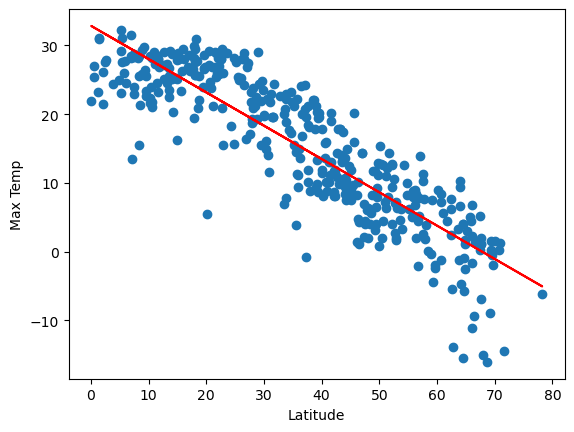

In [25]:
# Linear regression on Northern Hemisphere
x_values = northern_hemisphere_df["Lat"]
y_values = northern_hemisphere_df["Max Temp"]

plot_linear_regression(x_values, y_values, 40, 40)

The r-value is: 0.4985332973343215


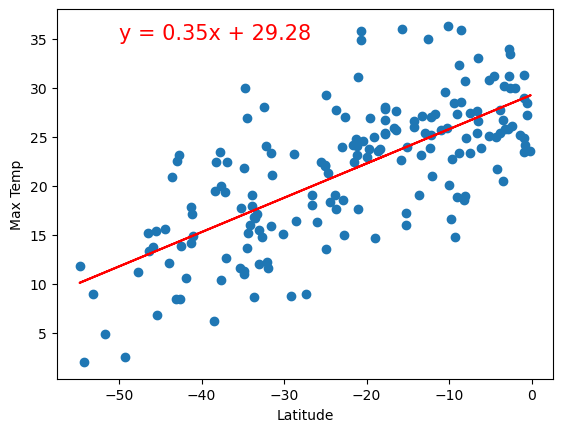

In [26]:
# Linear regression on Southern Hemisphere
x_values = southern_hemisphere_df["Lat"]
y_values = southern_hemisphere_df["Max Temp"]

plot_linear_regression(x_values, y_values, -50, 35)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.028158450068122183


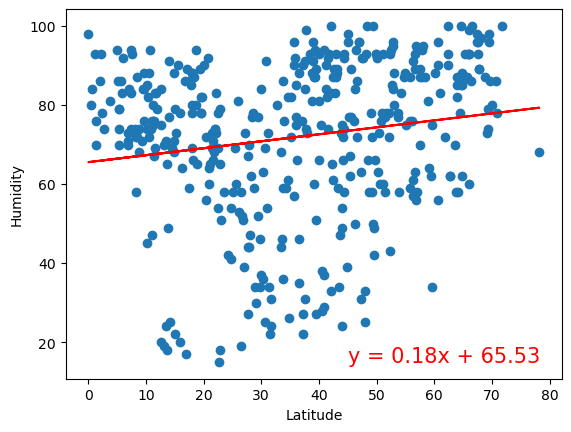

In [27]:
# Northern Hemisphere
x_values = northern_hemisphere_df["Lat"]
y_values = northern_hemisphere_df["Humidity"]

plot_linear_regression(x_values, y_values, 45, 15)

The r-value is: 0.007637045522134726


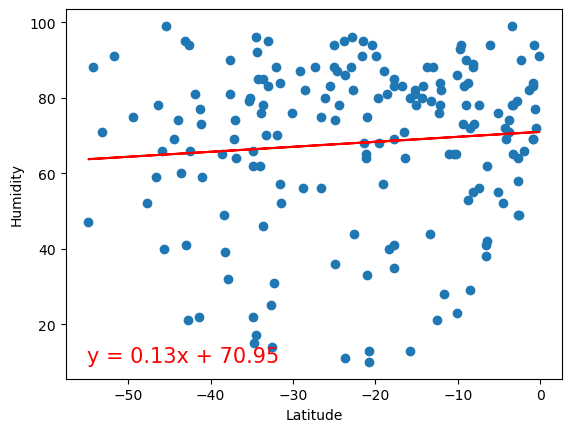

In [30]:
# Southern Hemisphere
x_values = southern_hemisphere_df["Lat"]
y_values = southern_hemisphere_df["Humidity"]

plot_linear_regression(x_values, y_values, -55, 10)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.03229233254432597


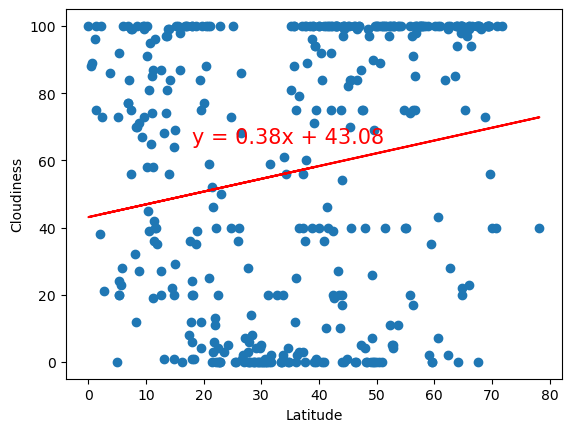

In [31]:
# Northern Hemisphere
x_values = northern_hemisphere_df["Lat"]
y_values = northern_hemisphere_df["Cloudiness"]

plot_linear_regression(x_values, y_values, 18, 65)

The r-value is: 0.02622929887647551


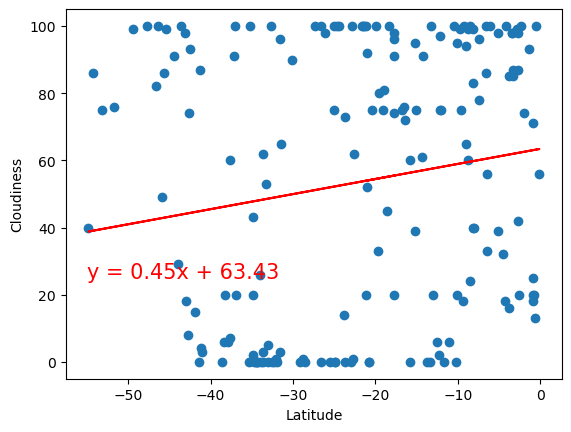

In [32]:
# Southern Hemisphere
x_values = southern_hemisphere_df["Lat"]
y_values = southern_hemisphere_df["Cloudiness"]

plot_linear_regression(x_values, y_values, -55, 25)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.05550166545189022


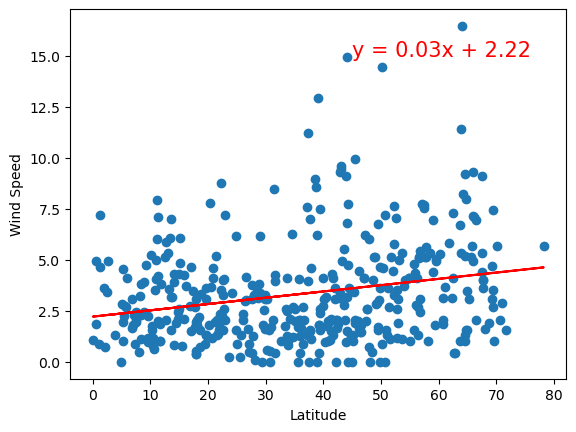

In [33]:
# Northern Hemisphere
x_values = northern_hemisphere_df["Lat"]
y_values = northern_hemisphere_df["Wind Speed"]

plot_linear_regression(x_values, y_values, 45, 15)

The r-value is: 0.007177957014433728


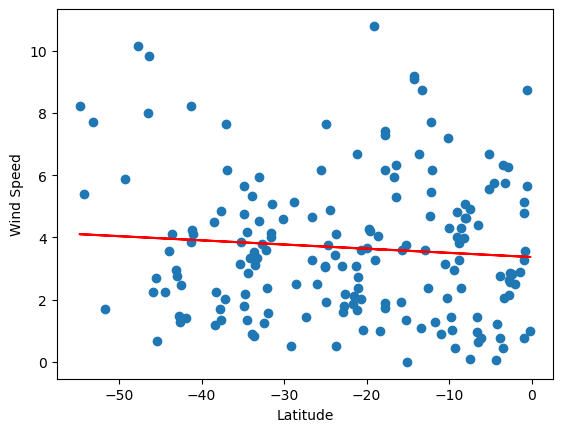

In [34]:
# Southern Hemisphere
x_values = southern_hemisphere_df["Lat"]
y_values = southern_hemisphere_df["Wind Speed"]

plot_linear_regression(x_values, y_values, -25, 15)

**Discussion about the linear relationship:** YOUR RESPONSE HERE